In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv("vacancies.csv")
data.head()

,company,description,experience,location,salary,technologies,title
0,Quod Financial,"<div class=""b-typo vacancy-section"">\n\t\t\t\t...",0-1 years,"Гданськ (Польща), віддалено",NaN,"python,git,jenkins,linux,bash",QA General (Trainee/Junior) with Python
1,bART Solutions,"<div class=""b-typo vacancy-section"">\n\t\t\t\t...",0-1 years,Львів,NaN,"python,django,git,postgresql,aws,react",Junior Python Engineer
2,Stylus,"<div class=""b-typo vacancy-section"">\n\t\t\t\t...",1-3 years,"Київ, за кордоном, віддалено",NaN,"python,django,fastapi,docker,kubernetes,git,po...",Python Engineer
3,Infineon Technologies,"<div class=""b-typo vacancy-section"">\n\t\t\t\t...",0-1 years,Львів,NaN,"python,agile",Student job: Software Engineer
4,Astronics CSC,"<div class=""b-typo vacancy-section"">\n\t\t\t\t...",0-1 years,Львів,$800,"python,git,linux,mysql,aws",Junior/Middle Python Developer


In [26]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company       152 non-null    object
 1   description   152 non-null    object
 2   experience    152 non-null    object
 3   location      152 non-null    object
 4   salary        28 non-null     object
 5   technologies  152 non-null    object
 6   title         152 non-null    object
dtypes: object(7)
memory usage: 8.4+ KB


,company,description,experience,location,salary,technologies,title
count,152,152,152,152,28,152,152
unique,132,152,4,45,24,141,116
top,Deloitte,"<div class=""b-typo vacancy-section"">\n\t\t\t\t...",5+ years,віддалено,$3000,python,Senior Python Developer
freq,3,1,68,59,2,6,13


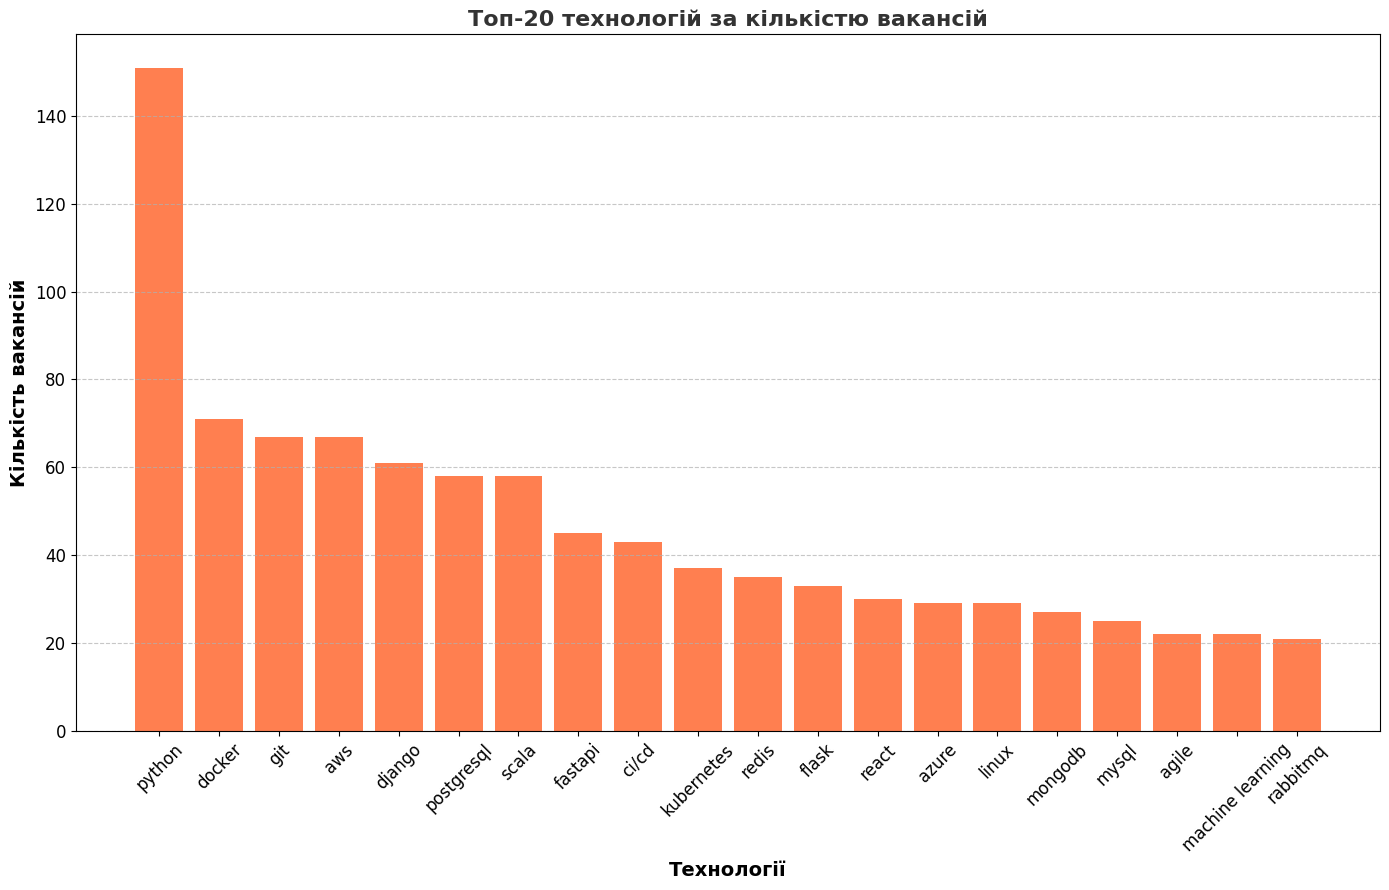

In [27]:
technology_counts = data["technologies"].str.get_dummies(sep=",").sum().sort_values(ascending=False)

top_20_technologies = technology_counts.head(20)

plt.figure(figsize=(14, 9))
plt.bar(top_20_technologies.index, top_20_technologies.values, color="#FF7F50")
plt.title("Топ-20 технологій за кількістю вакансій", fontsize=16, fontweight='bold', color="#333333")
plt.xlabel("Технології", fontsize=14, fontweight='bold')
plt.ylabel("Кількість вакансій", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

plt.show()

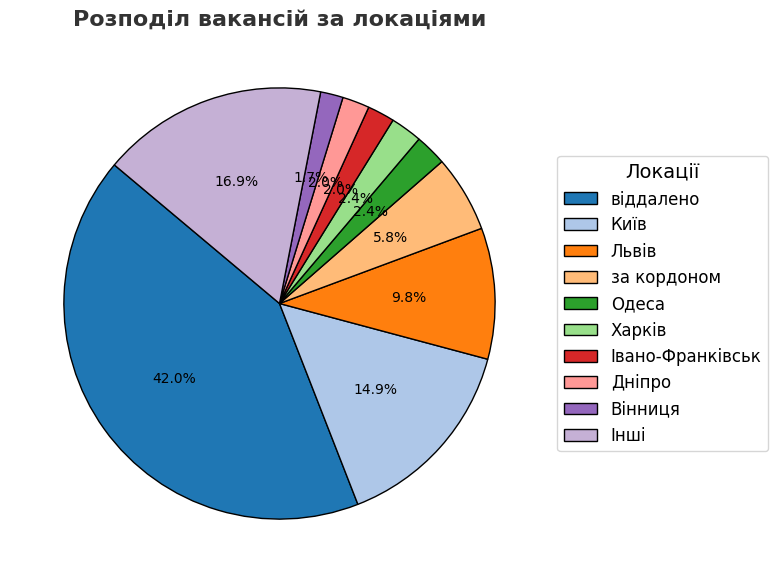

In [28]:
location_list = data["location"].dropna().apply(lambda x: x.split(","))
all_locations = [loc.strip() for sublist in location_list for loc in sublist]

location_counts = pd.Series(all_locations).value_counts()

top_9_locations = location_counts.head(9)

other_count = location_counts[9:].sum()
top_9_locations["Інші"] = other_count

plt.figure(figsize=(10, 7))
colors = plt.cm.tab20.colors[:len(top_9_locations)]

plt.pie(
    top_9_locations, 
    autopct="%1.1f%%", 
    startangle=140, 
    colors=colors, 
    wedgeprops={"edgecolor": "black"}
)

plt.legend(
    top_9_locations.index, 
    title="Локації", 
    loc="center left", 
    bbox_to_anchor=(1, 0.5), 
    fontsize=12, 
    title_fontsize=14
)

plt.title("Розподіл вакансій за локаціями", fontsize=16, fontweight="bold", color="#333333")
plt.show()

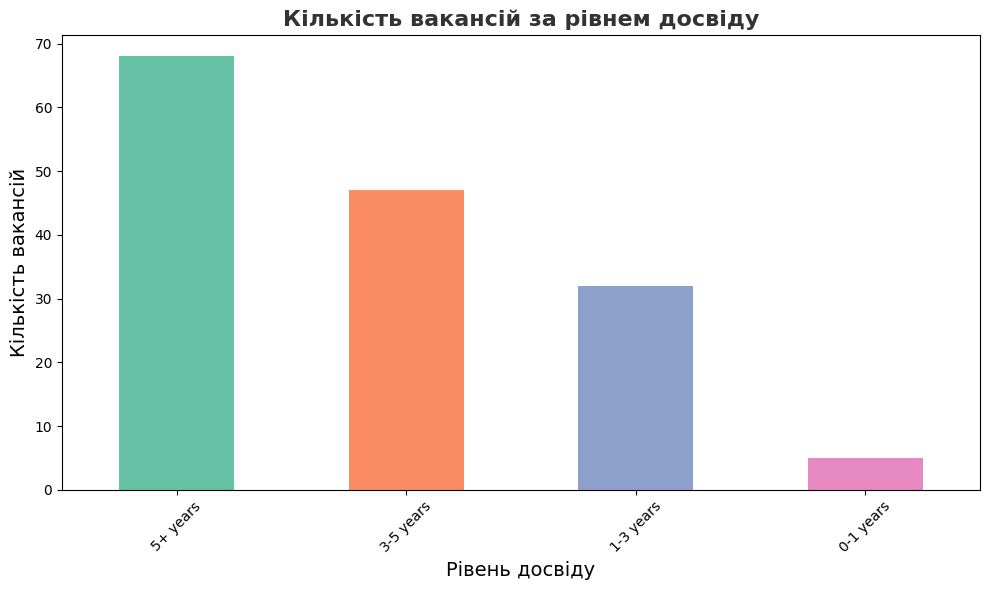

In [29]:
experience_counts = data["experience"].value_counts()

top_experience = experience_counts.head(5)

plt.figure(figsize=(10, 6))

colors = plt.cm.Set2(range(len(top_experience)))

top_experience.plot(kind="bar", color=colors)

plt.title("Кількість вакансій за рівнем досвіду", fontsize=16, fontweight="bold", color="#333333")
plt.xlabel("Рівень досвіду", fontsize=14)
plt.ylabel("Кількість вакансій", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()